In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('IMDB Dataset.csv')

In [3]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

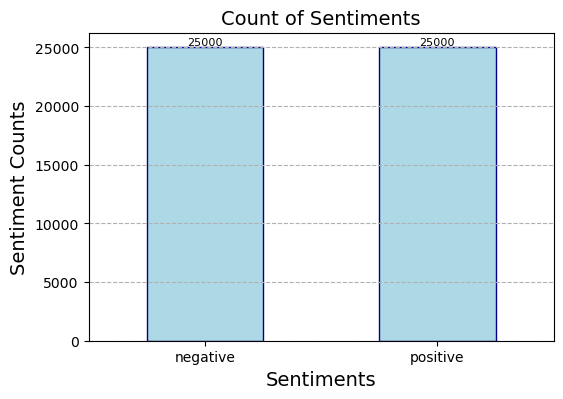

In [5]:
import matplotlib.pyplot as plt

labels =  dataset['sentiment'].value_counts().sort_index()
ex = labels.plot(kind = "bar", color = "lightblue", edgecolor = "darkblue", figsize = (6, 4))
ex.set_title("Count of Sentiments", fontsize = 14)
ex.set_xlabel("Sentiments", fontsize = 14)
ex.set_ylabel("Sentiment Counts", fontsize = 14)

for i, count in enumerate(labels):
    ex.text(i, count + 0.9 , str(count), ha="center", va='bottom', fontsize = 8)

ex.set_xticklabels(labels.index,rotation = 0)
ex.grid(axis = 'y', linestyle = '--')
plt.show()

# Review Cleaning

In [6]:
import string
import nltk
from datetime import datetime , timedelta
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning Function test

In [8]:
def data_cleaning(reviews):
    def clean_text(text):
        stop_words = set(stopwords.words('english'))
        
        # Remove Punctuation
        translator = str.maketrans('', '', string.punctuation)
        text = text.translate(translator)
        
        # To Lower Case
        text = text.lower()
        
        # Remove Special Characters and Emojis
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        
        # Remove Emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
        
        # Remove Stopwords
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    
    if isinstance(reviews, pd.Series):
        cleaned_reviews = reviews.apply(clean_text).tolist()
    elif isinstance(reviews, str):
        cleaned_reviews = clean_text(reviews)
    
    return cleaned_reviews


In [9]:
data_cleaning('The story of the movie is too bad, waste ! of / time 😭')

'story movie bad waste time'

In [10]:
cleaned_reviews = data_cleaning(dataset['review'])

In [11]:
dataset.insert(1, "Cleaned Reviews", cleaned_reviews)

In [12]:
dataset.head()

,review,Cleaned Reviews,sentiment
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...,positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,positive


In [15]:
pip install tensorflow

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1f/97/dec9dfa95cfbee631adffbeb0b7eda51ddc93a5f7e8aa8f4d95dde59e69e/tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.2 from https://files.pythonhosted.org/packages/46/87/c3e4e9fe7c630f38a6984afdd1d4ed531ef9c74dc66b86f46f6bdd89d608/tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

In [13]:
import numpy as np


from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input

In [14]:
x = dataset['Cleaned Reviews']
y = np.array(list(map(lambda x: 1 if x == "positive" else 0, dataset['sentiment'])))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [16]:
tokenizer = Tokenizer(oov_token='<UNK>')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [17]:
voc_size = len(tokenizer.word_index) + 1
voc_size

180446

In [18]:
max_len = 100

In [19]:
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

In [20]:
len(x_train[2])

100

In [21]:
embeddings_index = {}
embeddings_dim = 100
glove_file = open(r'glove.twitter.27B.100d.txt', encoding='utf-8')

for line in glove_file:
    value = line.split()
    word = value[0]
    coefs = np.asarray(value[1:], dtype='float32')
    embeddings_index[word] = coefs
glove_file.close()

In [22]:
embedding_matrix = np.zeros((voc_size, 100))

for word, i in tokenizer.word_index.items():
    if i >= voc_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [23]:
embedding_matrix.shape

(180446, 100)

In [24]:
model = Sequential()

In [25]:
embedding_layer = Embedding(voc_size, 100, weights=[embedding_matrix], trainable=False, input_shape=(max_len,), name="embedding_layer")
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid', name="output_layer"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)          │ (None, 100, 100)            │      18,044,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,161,977 (69.28 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 18,044,600 (68.83 MB)

In [28]:
model_history = model.fit(x_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 133ms/step - acc: 0.7149 - loss: 0.5427 - val_acc: 0.8150 - val_loss: 0.4207
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 129ms/step - acc: 0.8087 - loss: 0.4277 - val_acc: 0.8303 - val_loss: 0.3806
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 133ms/step - acc: 0.8339 - loss: 0.3773 - val_acc: 0.8432 - val_loss: 0.3517
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - acc: 0.8521 - loss: 0.3479 - val_acc: 0.8515 - val_loss: 0.3378
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - acc: 0.8607 - loss: 0.3293 - val_acc: 0.8396 - val_loss: 0.3987
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - acc: 0.8697 - loss: 0.3169 - val_acc: 0.8584 - val_loss: 0.3276


In [29]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - acc: 0.8596 - loss: 0.3292


In [30]:
print("Test Score: ",score[0])
print("Test Accuracy: ",score[1])

Test Score:  0.3305087387561798
Test Accuracy:  0.859000027179718


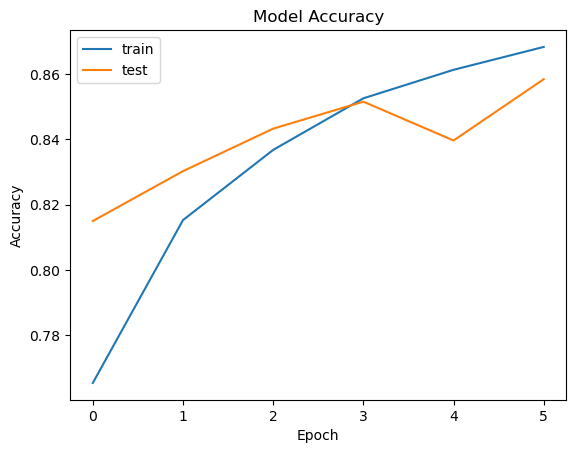

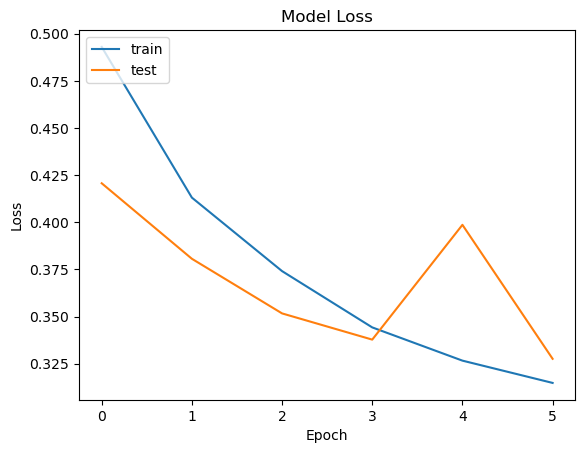

In [46]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [47]:
model.save("LSTM_Model.h5")

In [48]:
def sentiment_analysis(review):
    cleaned = data_cleaning(review)
    cleaned = [cleaned]

    review_sequences = tokenizer.texts_to_sequences(cleaned)
    padded_sequences = pad_sequences(review_sequences, maxlen=max_len, truncating='post', padding='post')


    prediction = model.predict(padded_sequences)
    
    if prediction*10 >= 6:
        print(f"Score: {prediction*10} Positive")
    else:
        print(f"Score: {prediction*10} Negative")


In [49]:
Review = input("Enter Review: ")
sentiment_analysis(Review)

Enter Review: There's a thin line between likably old-fashioned and fuddy-duddy, and The Count of Monte Cristo ... never quite settles on either side
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Score: [[2.991201]] Negative
